In [1]:
import os
os.chdir( "../")

In [2]:
import psutil
num_cpus = psutil.cpu_count(logical=False)
num_cpus 


8

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
import scipy.sparse as sps
from Data_manager.split_functions.split_train_validation_random_holdout import split_train_in_two_percentage_global_sample


path = "Dataset/data_train.csv"
df = pd.read_csv(filepath_or_buffer=path,
                               sep=",",
                               header=1,
                               engine='python',
                               names=['UserID', 'ItemID', 'Interaction'])

metric_to_optimize="MAP"

target_path = "Dataset/data_target_users_test.csv"
data_train = pd.read_csv(path)
data_target_df = pd.read_csv(target_path)

df

,UserID,ItemID,Interaction
0,1,15,1.0
1,1,16,1.0
2,1,133,1.0
3,1,161,1.0
4,1,187,1.0
...,...,...,...
478724,13024,13605,1.0
478725,13024,13823,1.0
478726,13024,15122,1.0
478727,13024,18185,1.0


In [4]:
data_target_df

,user_id
0,1
1,2
2,3
3,4
4,5
...,...
10877,13020
10878,13021
10879,13022
10880,13023


In [5]:
urm_df =  df.pivot(index='UserID', columns='ItemID', values='Interaction').fillna(0)

In [6]:
cold_users = [x for x in range(1,data_target_df["user_id"].max()+1) if x not in urm_df.index.tolist()]
cold_users

[22,
 60,
 65,
 166,
 168,
 180,
 204,
 224,
 261,
 316,
 325,
 354,
 390,
 402,
 408,
 449,
 475,
 506,
 517,
 527,
 608,
 777,
 779,
 780,
 797,
 821,
 828,
 948,
 954,
 983,
 1004,
 1033,
 1063,
 1142,
 1159,
 1204,
 1222,
 1243,
 1246,
 1279,
 1314,
 1358,
 1425,
 1431,
 1525,
 1613,
 1626,
 1635,
 1739,
 1780,
 1821,
 1897,
 1927,
 2064,
 2082,
 2088,
 2093,
 2112,
 2121,
 2197,
 2232,
 2235,
 2238,
 2301,
 2356,
 2425,
 2435,
 2436,
 2470,
 2552,
 2575,
 2800,
 2858,
 2879,
 2931,
 2940,
 2957,
 2964,
 2980,
 3061,
 3070,
 3074,
 3090,
 3152,
 3159,
 3166,
 3201,
 3206,
 3252,
 3286,
 3358,
 3478,
 3482,
 3487,
 3503,
 3536,
 3581,
 3597,
 3691,
 3725,
 3799,
 3840,
 3874,
 3882,
 3914,
 3934,
 3973,
 3986,
 4091,
 4092,
 4097,
 4099,
 4129,
 4172,
 4218,
 4239,
 4286,
 4302,
 4304,
 4331,
 4376,
 4378,
 4492,
 4551,
 4601,
 4637,
 4656,
 4739,
 4759,
 4773,
 4844,
 4892,
 4970,
 4996,
 5011,
 5014,
 5057,
 5069,
 5115,
 5118,
 5183,
 5220,
 5285,
 5296,
 5304,
 5311,
 5319,
 532

In [7]:
cold_users_rows = pd.DataFrame(np.zeros((len(cold_users), urm_df.shape[1])), index=cold_users, columns=urm_df.columns)
cold_users_rows

ItemID,1,2,3,4,5,6,7,8,9,10,...,22338,22339,22340,22341,22342,22343,22344,22345,22346,22347
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
full_df = pd.concat([urm_df, cold_users_rows])


In [77]:
full_df.index

ItemID,1,2,3,4,5,6,7,8,9,10,...,22338,22339,22340,22341,22342,22343,22344,22345,22346,22347
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
sorted_full_df = full_df.sort_index(axis=0)

In [13]:
sorted_full_df

ItemID,1,2,3,4,5,6,7,8,9,10,...,22338,22339,22340,22341,22342,22343,22344,22345,22346,22347
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13021,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13023,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sorted_full_df

In [18]:
item_map = {i : item for i, item in enumerate(urm_df.columns)}
item_map_inv = {item : i for i, item in item_map.items()}


In [19]:
urm_all = sps.csr_matrix(sorted_full_df.to_numpy())
del urm_df
del full_df
del cold_users_rows
del sorted_full_df

import gc
gc.collect()

0

In [21]:
urm_all

<13024x22222 sparse matrix of type '<class 'numpy.float64'>'
	with 478729 stored elements in Compressed Sparse Row format>

In [22]:
userId_unique = urm_all.shape[0]
itemId_unique =  urm_all.shape[1]

In [23]:

seeds = [
    1811854, 3772146, 6407100, 6926227, 1340378, 
    68679, 3822303, 4058970, 1264160, 1100338, 
    6552126, 725363, 8362134, 9446122, 5256199, 
    4686339, 3830906, 7315366, 9428914, 5564236, 
    3420043, 9223036, 851434, 3300082, 7899660, 
    2053768, 4305274, 3709256, 8795594, 1418903, 
    7428566, 157832
]

seeds = seeds[:num_cpus]


urm_train_validation = []
urm_test = []
urm_train = []
urm_validation = []

for i in range(len(seeds)):
    a, b = split_train_in_two_percentage_global_sample(urm_all, train_percentage = 0.80,seed=seeds[i])
    c, d = split_train_in_two_percentage_global_sample(a, train_percentage = 0.80,seed=seeds[i])
    urm_train_validation.append(a)
    urm_test.append(b)
    urm_train.append(c)
    urm_validation.append(d)



In [24]:
from Evaluation.Evaluator import EvaluatorHoldout
evaluator_test = []
for u in urm_test:
    evaluator_test.append(EvaluatorHoldout(u, cutoff_list=[10], ignore_users=[]))

EvaluatorHoldout: Ignoring 2552 (19.6%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Ignoring 2536 (19.5%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Ignoring 2576 (19.8%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Ignoring 2580 (19.8%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Ignoring 2551 (19.6%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Ignoring 2531 (19.4%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Ignoring 2557 (19.6%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users
EvaluatorHoldout: Ignoring 2584 (19.8%) Users that have less than 1 test interactions
EvaluatorHoldout: Ignoring 0 Users


In [25]:
import optuna
host = "192.168.16.83"
port = 3306
database_name = "optuna_mio"
username = "root"
password = "Japo2001"

# Create an SQLAlchemy engine
mysql_url = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database_name}"
mysql_url
storage = optuna.storages.RDBStorage(url=mysql_url)

ials_name = "IALS_8FOLD"
knn_name = "ITEMKNN_8FOLD"
slim_name = "SLIMEN_8FOLD"
rp3beta_name = "RP3_8FOLD"
p3alpha_name = "P3Alpha_8FOLD"
hybrid_name = "NEWHYBRID10_DB"
ials_study = optuna.load_study(study_name=ials_name, storage=storage)
knn_study = optuna.load_study(study_name=knn_name, storage=storage)
slim_study = optuna.load_study(study_name=slim_name, storage=storage)
rp3beta_study = optuna.load_study(study_name=rp3beta_name, storage=storage)
p3alpha_study = optuna.load_study(study_name=p3alpha_name, storage=storage)
hybrid_study = optuna.load_study(study_name=hybrid_name, storage=storage)


studies = [knn_study, slim_study, rp3beta_study, p3alpha_study, ials_study]
recommenders_list = ["Hybrid", "itemKNN", "RP3beta", "P3alpha", "IALS", "SLIM_EN", "TopPop"]

#recommenders_list = ["itemKNN", "RP3beta", "P3alpha", "IALS", "SLIM_EN", "TopPop"]

In [26]:
from Recommenders.KNN.ItemKNNCFRecommender import ItemKNNCFRecommender
from Recommenders.MatrixFactorization.ImplicitIALSRecommender import ImplicitALSRecommender
from Recommenders.GraphBased.RP3betaRecommender import RP3betaRecommender
from Recommenders.GraphBased.P3alphaRecommender import P3alphaRecommender
from Recommenders.SLIM.SLIMElasticNetRecommender import MultiThreadSLIM_SLIMElasticNetRecommender
from Recommenders.Recommender_import_list import *

In [27]:
knn = ItemKNNCFRecommender(urm_train_validation[0], verbose=False)
knn.fit(topK=knn_study.best_params["topK"], shrink=knn_study.best_params["shrink"])


slim = MultiThreadSLIM_SLIMElasticNetRecommender(urm_train_validation[0], verbose=False)
slim.fit(topK=slim_study.best_params["topK"], l1_ratio=slim_study.best_params["l1_ratio"], alpha=slim_study.best_params["alpha"], verbose=False, workers=12)


ials = ImplicitALSRecommender(urm_train_validation[0], verbose=False)
ials.fit(use_gpu=True, num_threads=1, **ials_study.best_params)


rp3beta = RP3betaRecommender(urm_train_validation[0], verbose=False)
rp3beta.fit(topK=rp3beta_study.best_params["topK"], alpha=rp3beta_study.best_params["alpha"], beta=rp3beta_study.best_params["beta"])


p3alpha = P3alphaRecommender(urm_train_validation[0], verbose=False)
p3alpha.fit(topK=p3alpha_study.best_params["topK"], alpha=p3alpha_study.best_params["alpha"])


TopPop_recommender = TopPop(urm_train_validation[0])
TopPop_recommender.fit()
    

recommenders = {
    "itemKNN" : knn,
    "SLIM_EN" : slim,
    "IALS" : ials,
    "RP3beta" : rp3beta,
    "P3alpha" : p3alpha,  
}

hybrid_recommender = GeneralizedLinearHybridRecommender(urm_train_validation[0], list(recommenders.values()), verbose=False)
hybrid_recommender.fit([hybrid_study.best_params['alpha_{}'.format(i) ] for i, study in enumerate(studies)])

recommenders["TopPop"] = TopPop_recommender
recommenders["Hybrid"] = hybrid_recommender


Similarity column 22222 (100.0%), 13030.60 column/sec. Elapsed time 1.71 sec
Using gpu: True
TopPopRecommender: URM Detected 615 ( 4.7%) users with no interactions.
TopPopRecommender: URM Detected 126 ( 0.6%) items with no interactions.


In [28]:


recommenders_tuple = [(recommenders_list[i], study.best_value, recommenders[recommenders_list[i]]) for i, study in enumerate(studies)]
# sort studies by best value
recommenders_tuple.append(("TopPop", 0.0, TopPop_recommender))
recommenders_tuple.sort(key=lambda x: x[1], reverse=True)
recommenders_tuple



[('itemKNN',
  0.0494009148817492,
  <Recommenders.KNN.ItemKNNCFRecommender.ItemKNNCFRecommender at 0x7f82462f4430>),
 ('RP3beta',
  0.04869067440247042,
  <Recommenders.GraphBased.RP3betaRecommender.RP3betaRecommender at 0x7f8315476d30>),
 ('P3alpha',
  0.042847568800941496,
  <Recommenders.GraphBased.P3alphaRecommender.P3alphaRecommender at 0x7f8246295310>),
 ('IALS',
  0.035175606118385265,
  <Recommenders.MatrixFactorization.ImplicitIALSRecommender.ImplicitALSRecommender at 0x7f83151f5d30>),
 ('Hybrid',
  0.027684590681997665,
  <Recommenders.Hybrid.GeneralizedLinearHybridRecommender.GeneralizedLinearHybridRecommender at 0x7f82462c0190>),
 ('TopPop',
  0.0,
  <Recommenders.NonPersonalizedRecommender.TopPop at 0x7f82462a6e50>)]

In [158]:
import xgboost as xgb
from xgboost import XGBRanker, plot_importance
from Recommenders.BaseRecommender import BaseRecommender

class XGBoostRecommender(BaseRecommender):

    RECOMMENDER_NAME = "XGBoostRecommender"

    def __init__(self,
                URM_train,
                recommenders,
                main_recommender,
                verbose = True,
                n_estimators = 150,
                learning_rate = 1e-1,
                reg_alpha = 1e-1,
                reg_lambda = 1e-1,
                max_depth = 15,
                max_leaves = 0,
                grow_policy = "depthwise",
                objective = "pairwise",
                booster = "gbtree",
                random_seed = None,
                ):

        super(XGBoostRecommender, self).__init__(URM_train, verbose=verbose)

        self.XGB_model = XGBRanker(objective='rank:{}'.format(objective),
                                n_estimators = int(n_estimators),
                                random_state = random_seed,
                                learning_rate = learning_rate,
                                reg_alpha = reg_alpha,
                                reg_lambda = reg_lambda,
                                max_depth = int(max_depth),
                                max_leaves = int(max_leaves),
                                grow_policy = grow_policy,
                                verbosity = 0, # 2 if self.verbose else 0,
                                booster = booster,
                                tree_method = "gpu_hist",
                                device="cuda",
                                enable_categorical = True,
                                
                            )
        self.recommenders = recommenders
        self.main_recommender = main_recommender
        self.X_train = None
        self.y_train = None
        
    def fit(self,cutoff=20):
        xgboost_values = []
        suggestions, scores_MAIN = self.recommenders[self.main_recommender].recommend(data_target_df["user_id"]-1, cutoff=cutoff, return_scores=True)
        other_list = [recommender for recommender in recommenders_list if recommender != self.main_recommender]
        scores_others = {}
        for i, recommender in enumerate(other_list):
            _, scores_others[recommender] = self.recommenders[recommender].recommend(data_target_df["user_id"]-1, cutoff=cutoff, return_scores=True)
        for i, suggestion in enumerate(suggestions):
            for item_id in suggestion:
                xgboost_values.append([data_target_df["user_id"][i]-1, item_id, urm_test[0][data_target_df["user_id"][i]-1,item_id] == 1,scores_MAIN[i][item_id]]+[scores_others[other][i][item_id] for other in other_list])
        
        # add top pop items to users with 0 label
        # toppop_items, scores_toppop = self.recommenders["TopPop"].recommend(1, cutoff=cutoff, return_scores=True)
        # for user in data_target["user_id"]:
        #     xgboost_values.append([user, toppop_items+1, 0, 0]+[0 for other in other_list if other != "TopPop"]+[scores_toppop[0][item_map[item]] for item in toppop_items])
        
        xgboost_df = pd.DataFrame(xgboost_values,columns=["user_id", "item_id", "label", self.main_recommender]+other_list)

        self.y_train = xgboost_df["label"]
        self.X_train = xgboost_df.drop(columns=["label"])
        self.X_train["user_id"] = self.X_train["user_id"].astype("category")
        self.X_train["item_id"] = self.X_train["item_id"].astype("category")
        groups = xgboost_df.groupby("user_id").size().values
        self.XGB_model.fit(self.X_train,
                    self.y_train,
                    group=groups,
                    verbose=True)
    
    def get_URM_train(self):
        return self.URM_train

    def _compute_item_score(self, user_id_array, items_to_compute):
        item_weights = np.zeros((len(user_id_array), self.n_items))
        for i, user in enumerate(user_id_array):
            if user in data_target_df["user_id"].values-1:
                X_to_predict = self.X_train[self.X_train["user_id"] == user]
                scores = self.XGB_model.predict(X_to_predict)
                scores = (scores - scores.min())/(scores.max() - scores.min() + 1e-12)
                item_weights[i][X_to_predict["item_id"]] = scores

        return item_weights

In [159]:
main_recommender = "Hybrid"
XGBoostRecommender = XGBoostRecommender(urm_train_validation[0], recommenders, main_recommender)

XGBoostRecommender: URM Detected 615 ( 4.7%) users with no interactions.
XGBoostRecommender: URM Detected 126 ( 0.6%) items with no interactions.


In [160]:
XGBoostRecommender.fit(cutoff=15)

In [ ]:
XGBoostRecommender.X_train[XGBoostRecommender.X_train["user_id"] == 0]

,user_id,item_id,Hybrid,itemKNN,RP3beta,P3alpha,IALS,SLIM_EN,TopPop
0,0,100,0.882221,0.884064,0.467011,0.227518,0.659708,0.483493,353.0
1,0,35,0.828251,0.693750,0.425566,0.267021,0.796933,0.455192,550.0
2,0,122,0.639164,0.408822,0.265214,0.292347,0.657138,0.399957,160.0
3,0,160,0.581870,0.477406,0.252036,0.040763,0.900694,0.319184,197.0
4,0,402,0.484934,0.809314,0.208852,0.064699,0.587783,0.241971,100.0
5,0,514,0.430191,0.851372,0.166516,0.028230,0.538795,0.212727,77.0
6,0,693,0.373659,0.453658,0.115182,0.129126,0.331893,0.246104,108.0
7,0,591,0.334862,0.412536,0.108663,0.099705,0.413185,0.203800,128.0
8,0,1480,0.333594,0.473350,0.109611,0.069659,0.338129,0.204819,63.0
9,0,505,0.323175,0.713702,0.098501,0.031653,0.348722,0.176275,87.0


In [161]:
evaluation_res = evaluator_test[0].evaluateRecommender(XGBoostRecommender)

EvaluatorHoldout: Processed 10472 (100.0%) in 2.70 min. Users per second: 65


In [169]:
evaluation_res[0]

,PRECISION,PRECISION_RECALL_MIN_DEN,RECALL,MAP,MAP_MIN_DEN,MRR,NDCG,F1,HIT_RATE,ARHR_ALL_HITS,...,COVERAGE_USER,COVERAGE_USER_HIT,USERS_IN_GT,DIVERSITY_GINI,SHANNON_ENTROPY,RATIO_DIVERSITY_HERFINDAHL,RATIO_DIVERSITY_GINI,RATIO_SHANNON_ENTROPY,RATIO_AVERAGE_POPULARITY,RATIO_NOVELTY
cutoff,,,,,,,,,,,,,,,,,,,,,
10,0.123883,0.197409,0.161343,0.123871,0.197389,0.568192,0.273536,0.140153,0.568277,0.823671,...,0.804054,0.456926,0.804054,0.066096,10.315898,0.997867,0.189533,0.794637,1.516519,0.310895


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

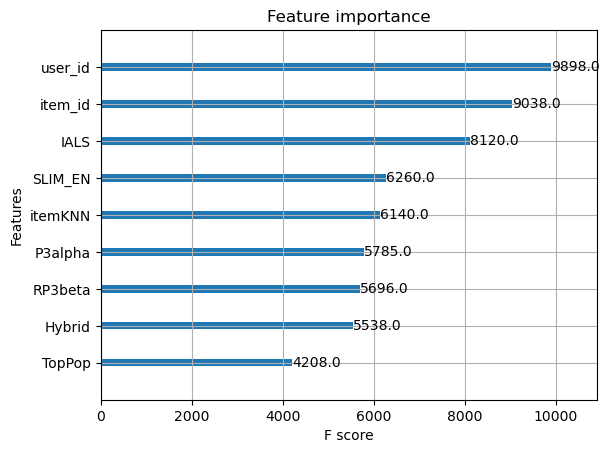

In [170]:
#plot importance
plot_importance(XGBoostRecommender.XGB_model)

In [171]:
base = XGBoostRecommender.X_train[XGBoostRecommender.X_train["user_id"] == 0]["item_id"].values

In [172]:
sugg = XGBoostRecommender.recommend([0], cutoff=10)[0]

In [173]:
suggest = [item_map[item] for item in sugg]
suggest

[161, 36, 101, 123, 694, 1546, 515, 52, 342, 506]

In [174]:
sugg = XGBoostRecommender.recommend([123], cutoff=10)[0]

In [175]:
suggest = [item_map[item] for item in sugg]
suggest

[1294, 346, 1619, 94, 4162, 1704, 3520, 8112, 1342, 2590]

In [176]:
sugg = XGBoostRecommender.recommend([64], cutoff=10)[0]

In [177]:
suggest = [item_map[item] for item in sugg]
suggest

[14839, 14832, 14848, 14846, 14845, 14844, 14842, 14847, 14843, 14850]